(400000, 12)
-0.1491805005
14.41257336736577
Optimization terminated successfully.
         Current function value: 0.340891
         Iterations 7
(400000, 12)
0.145685827
14.487973775638919
Optimization terminated successfully.
         Current function value: 0.337340
         Iterations 7
(400000, 12)
-0.08603950550000002
14.623672644183733
Optimization terminated successfully.
         Current function value: 0.367053
         Iterations 7
(400000, 12)
0.0038726950000000215
14.208038605325294
Optimization terminated successfully.
         Current function value: 0.299750
         Iterations 7


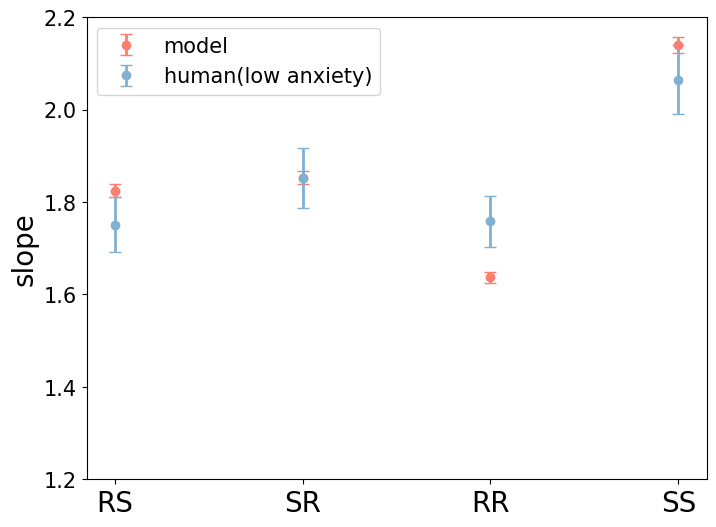

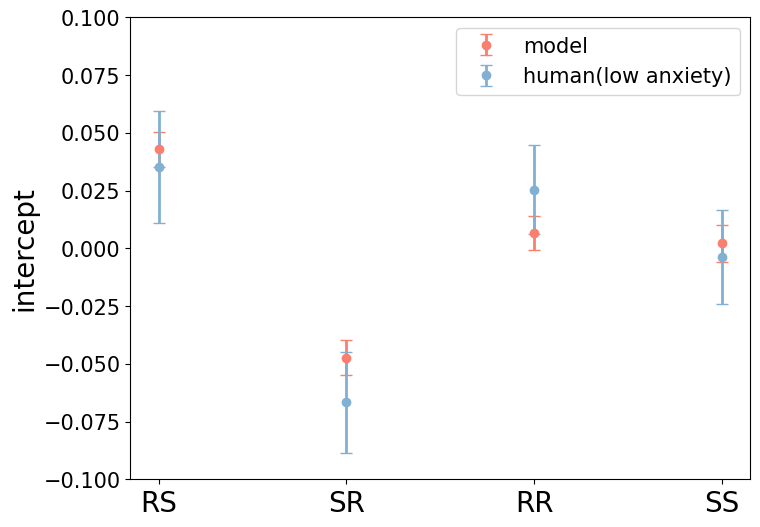

In [1]:

import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Probit
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('default')
def standardization(data):
    data = np.array(data)
    mu = np.mean(data, axis=0)
    print(mu)
    sigma = np.std(data, axis=0)
    print(sigma)
    return (data ) / (sigma + 1e-9)


if __name__ == '__main__':

    conditions = ['RS','SR','RR','SS']
    # conditions = ['SR', 'SR', 'SR', 'SR']
    # conditions = [1,2,3,4]
    const_list = []
    v_list = []
    std_const_list = []
    std_v_list = []

    for cond in conditions:
        Data = pd.read_csv(f'bandit_data/analysed_2D_fan_'+cond+'low1.csv')
        print(Data.shape)
        Data['choice'] = Data['choice'] & 1

        Data = Data[Data.trial > 4]
        Data = Data[Data.trial < 15]

        C_list = Data['choice'].tolist()
        Y = C_list
        V_list = (Data['Q0']-Data['Q1']).tolist()
        V_list = standardization(V_list)
        X = np.array(V_list).T
        X = pd.DataFrame(X, columns=['V'])
        X = sm.add_constant(X)
        model = Probit(Y, X)
        # model = MixedLM(Y, X)
        probit_model = model.fit()
        const = probit_model.params['const']
        v = probit_model.params['V']
        std_const = probit_model.params['const'] - probit_model.conf_int()[0]['const']
        std_v = probit_model.params['V'] - probit_model.conf_int()[0]['V']
        const_list.append(const)
        v_list.append(v)
        std_const_list.append(std_const)
        std_v_list.append(std_v)

    fig, ax1 = plt.subplots(figsize = (8,6))
    plt.ylim(1.2, 2.2)

    ax1.errorbar(1, v_list[0], yerr=std_v_list[0], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4,label='model')
    ax1.errorbar(2, v_list[1], yerr=std_v_list[1], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(3, v_list[2], yerr=std_v_list[2], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(4, v_list[3], yerr=std_v_list[3], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    plt.ylim(1.2,2.2)
    # from gershman
    ax1.errorbar(1, 1.7513, yerr=0.058648, fmt="o", color='#82B0D2',elinewidth=2,capsize=4,label='human(low anxiety)')
    ax1.errorbar(2, 1.852, yerr=0.0658, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(3, 1.7582, yerr=0.055863, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(4, 2.0644, yerr=0.074828, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    plt.xticks([1, 2, 3, 4], ['RS', 'SR', 'RR', 'SS'])
    plt.xticks(size=20)
    plt.yticks(size=15)
    plt.ylabel('slope', size=20)
    plt.legend(prop = {'size':15})


    plt.show()

    fig, ax1 = plt.subplots(figsize = (8,6))
    plt.ylim(-0.1, 0.1)
    ax1.errorbar(1, const_list[0], yerr=std_const_list[0], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4,label='model')
    ax1.errorbar(2, const_list[1], yerr=std_const_list[1], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(3, const_list[2], yerr=std_const_list[2], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(4, const_list[3], yerr=std_const_list[3], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    plt.ylim(-0.1, 0.1)

    #from fan's data
    ax1.errorbar(1, 0.035103, yerr=0.024205, fmt="o", color='#82B0D2',elinewidth=2,capsize=4,label='human(low anxiety)')
    ax1.errorbar(2, -0.066627, yerr=0.021859, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(3, 0.025406, yerr=0.019441, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(4, -0.0038405, yerr=0.020202, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    plt.xticks([1, 2, 3, 4], ['RS', 'SR', 'RR', 'SS'])
    plt.legend(prop = {'size':15})
    plt.ylabel('intercept', size=20)
    plt.xticks(size=20)
    plt.yticks(size=15)

    plt.show()